### OpTimizer used-
* Adagrad
* Adadelta
* RMSprop
* Adam
* AdaMax
* Nadam
* AMSGrad
#### we update everyone one by one with Different Activitation function

## ACTIVATION FUNCTION USED-RELU

### OPTIMIZER
### sgd= data-lr*grad
* SGD
* epochs = 300
* learning_rate = 0.1
* decay_rate = learning_rate / epochs
* momentum = 0.8


* SGD with Momentum
* The real momentum update looks likevelocity=viscosityvelocity−lrgraddata=data−velocity
* velocity = viscosity _ velocity - lr_ grad \\
* data = data - velocity
* velocity=viscosityv​elocity−lrg​raddata=data−velocityBut In pytorch they do the other wayvelocity=viscosityvelocity+graddata=data−lrvelocity
* velocity = viscosity _ velocity + grad \\
* data = data - lr _ velocity
* velocity=viscosityv​elocity+graddata=data−lrv​elocity

In [2]:
#import require library
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from pandas import DataFrame

In [4]:
#from google.colab import files
#uploaded = files.upload()


Saving allsyn.csv to allsyn (1).csv


In [0]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['allsyn.csv']))

In [3]:
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset\\desktop")
# read the file
df = pd.read_csv("allsyn.csv")

In [4]:
# show te columns
df.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [8]:
# give the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [9]:
#check the uniqe column
colomn_uniques=[]
# take a loop inside the dataset
for col in df.iloc[:,1:117]:
    #append that loop and find how much type of observation in dataset 
    colomn_uniques.append([col,len(df[col].unique())])
print(colomn_uniques)

[['cat1', 2], ['cat2', 2], ['cat3', 2], ['cat4', 2], ['cat5', 2], ['cat6', 2], ['cat7', 2], ['cat8', 2], ['cat9', 2], ['cat10', 2], ['cat11', 2], ['cat12', 2], ['cat13', 2], ['cat14', 2], ['cat15', 2], ['cat16', 2], ['cat17', 2], ['cat18', 2], ['cat19', 2], ['cat20', 2], ['cat21', 2], ['cat22', 2], ['cat23', 2], ['cat24', 2], ['cat25', 2], ['cat26', 2], ['cat27', 2], ['cat28', 2], ['cat29', 2], ['cat30', 2], ['cat31', 2], ['cat32', 2], ['cat33', 2], ['cat34', 2], ['cat35', 2], ['cat36', 2], ['cat37', 2], ['cat38', 2], ['cat39', 2], ['cat40', 2], ['cat41', 2], ['cat42', 2], ['cat43', 2], ['cat44', 2], ['cat45', 2], ['cat46', 2], ['cat47', 2], ['cat48', 2], ['cat49', 2], ['cat50', 2], ['cat51', 2], ['cat52', 2], ['cat53', 2], ['cat54', 2], ['cat55', 2], ['cat56', 2], ['cat57', 2], ['cat58', 2], ['cat59', 2], ['cat60', 2], ['cat61', 2], ['cat62', 2], ['cat63', 2], ['cat64', 2], ['cat65', 2], ['cat66', 2], ['cat67', 2], ['cat68', 2], ['cat69', 2], ['cat70', 2], ['cat71', 2], ['cat72', 2], 

In [10]:
# Vector creation and append it
VECTOR=[]
for col in df.iloc[:,1:117]:
    VECTOR.append(len(df[col].unique()))
np.sort(VECTOR)

array([  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   5,   5,   5,
         7,   7,   7,   7,   8,   8,   8,   9,  11,  13,  15,  16,  16,
        17,  17,  19,  19,  20,  20,  23,  51,  61,  84, 131, 326])

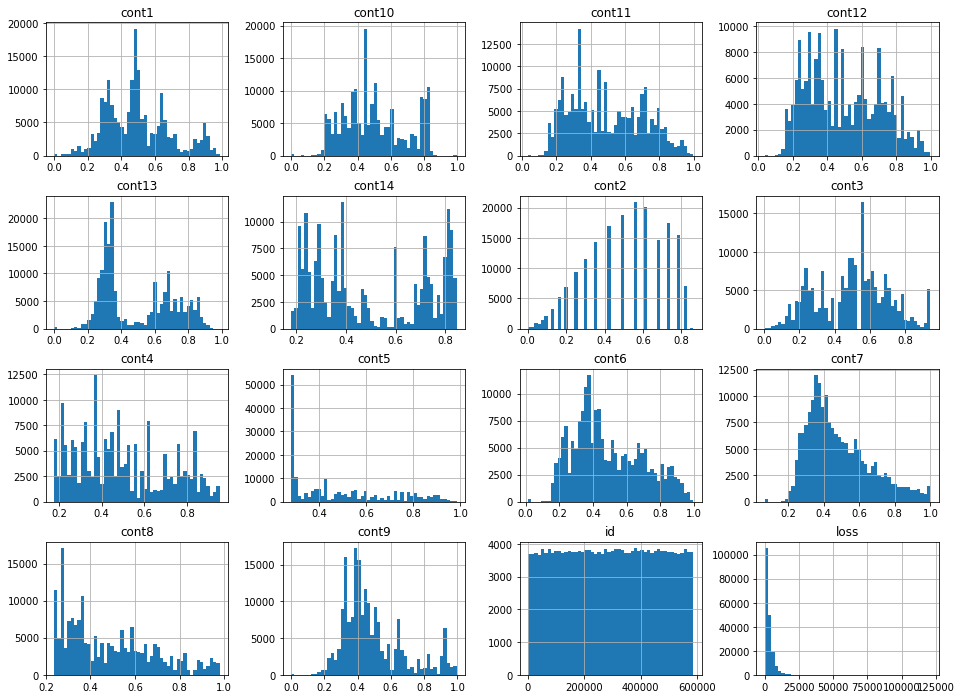

In [12]:
# plot a pairplot
df.hist(bins=50, figsize=(16,12));

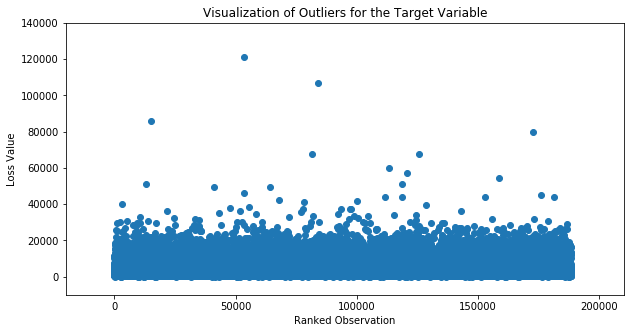

In [0]:
# plot the target and observe outlier
plt.figure(figsize=(10,5))
plt.xlabel('Ranked Observation')
plt.ylabel('Loss Value')
plt.title('Visualization of Outliers for the Target Variable')
plt.xlim([-20000,210318])
plt.ylim([-10000,140000])
plt.plot(df.index, df["loss"],'o')
plt.show()

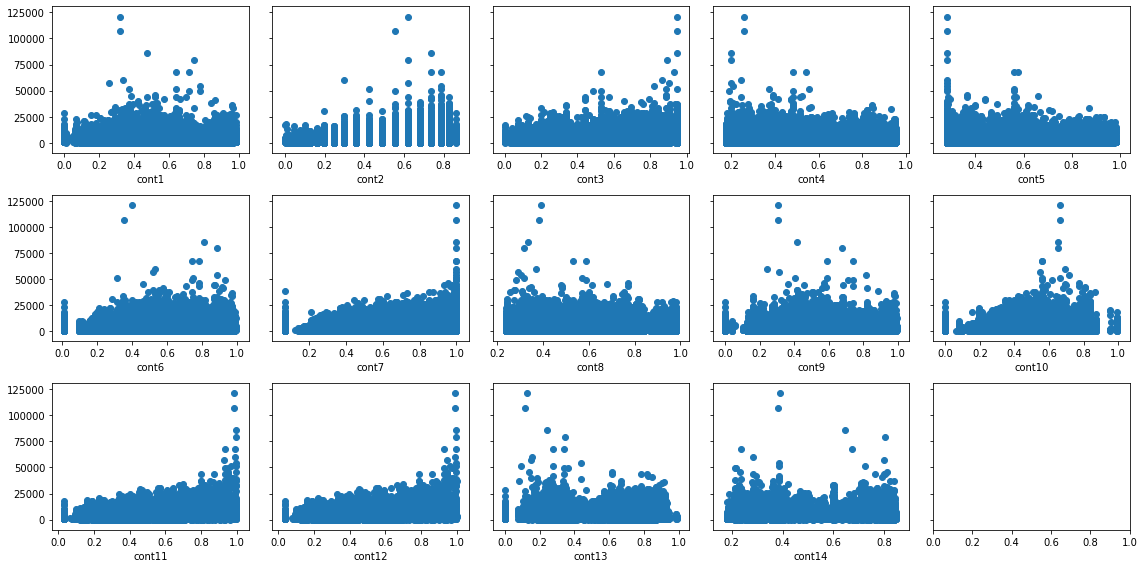

In [24]:
# take a loop inside a dataframe and plot them if theey are continous
cont_features = [col for col in df.columns[1:-1] if 'cont' in col]
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16, 8), sharey=True)
# assisgn blank value
Ai = 0
Bi = 0

for i in range(0, 14):
    axes[Ai][Bi].scatter(df[cont_features[i]], df.loss)
    axes[Ai][Bi].set_xlabel(cont_features[i])
    Bi += 1
    if Bi > 4:
        Ai += 1
        Bi = 0
plt.tight_layout();

In [25]:
#check wether we have to go for classification
df.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,1.000000,0.002130,0.000783,0.000816,0.002578,0.000775,0.001426,0.002209,0.005534,0.001870,0.002582,0.001075,0.000889,0.000442,-0.004924,-0.001122
cont1,0.002130,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.010237
cont2,0.000783,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.141528
cont3,0.000816,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.111053
cont4,0.002578,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.035831
cont5,0.000775,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.011355
cont6,0.001426,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.040967
cont7,0.002209,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.119799
cont8,0.005534,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.030508
cont9,0.001870,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.014456


### Two cluster of continuous variable are identified

AttributeError: ignored

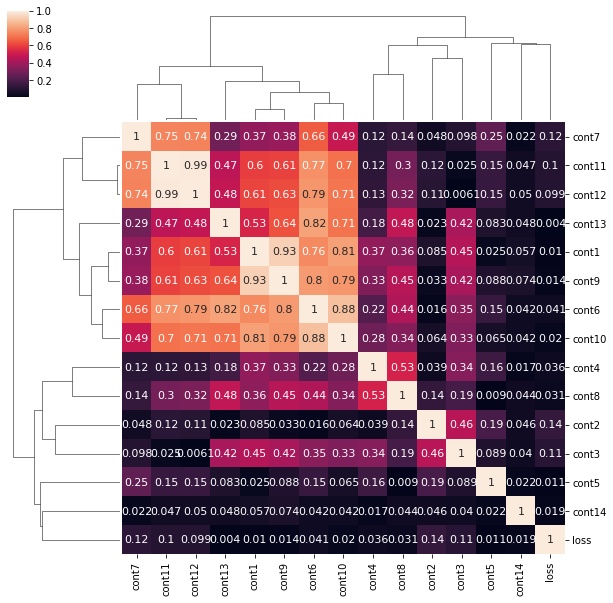

In [26]:
# plot a heat map
df_CONTINUOUS = df.iloc[:,117:132]
df_CONTINUOUS = df_CONTINUOUS.corr().abs()
map = sns.clustermap(df_CONTINUOUS, annot = True, annot_kws = {'size': 11})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

##  categorical variable

In [27]:
MAXI = []
for col in df:
    if df[col].dtype == "object" and len(df[col].unique()) == 2:
        value_counting = df[col].value_counts(normalize=True)
        MAXI.append(value_counting.max())
MAXII = np.sort(MAXI)
MAXII

array([0.56670632, 0.60069669, 0.62830956, 0.65706411, 0.68179887,
       0.6993118 , 0.73073737, 0.75165412, 0.83004811, 0.83605922,
       0.84869742, 0.85075776, 0.88004864, 0.89309572, 0.89343557,
       0.89662698, 0.89913338, 0.90256375, 0.91715078, 0.91838805,
       0.94053144, 0.94135452, 0.94517253, 0.94864007, 0.95119426,
       0.9532015 , 0.95573445, 0.95646194, 0.96081097, 0.9620801 ,
       0.96561667, 0.96632823, 0.97165433, 0.97384743, 0.9757113 ,
       0.97580688, 0.97702291, 0.97765482, 0.98021963, 0.98110643,
       0.98395268, 0.98790875, 0.9879884 , 0.99039922, 0.99099927,
       0.99304899, 0.99337822, 0.99356939, 0.99475887, 0.99491817,
       0.99531643, 0.99616606, 0.99627757, 0.99632536, 0.99689886,
       0.99763167, 0.9978069 , 0.99836978, 0.99840695, 0.99857157,
       0.99873087, 0.99886893, 0.99891673, 0.99903355, 0.99923003,
       0.99924596, 0.9995805 , 0.99975042, 0.99976104, 0.99977166,
       0.99981945, 0.99987787])

In [28]:
##predictive predictable
VARIANCE = []
dif = []
for col in df:
    if df[col].dtype == "object" and len(df[col].unique()) == 2:
        grouped = df['loss'].groupby(df[col]).mean()
        dif = np.absolute(grouped['A']-grouped['B'])
        VARIANCE.append(dif)
VARIANCEE = np.sort(VARIANCE)
VARIANCEE

array([  84.00403236,   87.1333461 ,   98.3566689 ,  161.89398671,
        219.66219803,  294.44206558,  347.51984609,  389.12050953,
        399.29427736,  438.68116334,  505.42576009,  517.72273709,
        595.88053718,  604.32483243,  649.36147112,  661.56539384,
        722.13068415,  740.23095079,  814.78062791,  838.35871428,
        841.92390654,  878.26005299,  890.20917763,  893.89819828,
        922.60835399,  938.67083749, 1037.64645865, 1044.78417076,
       1053.43368112, 1159.15334774, 1209.74389267, 1210.29034163,
       1212.34182674, 1233.78397837, 1241.88005093, 1257.13905198,
       1315.61284757, 1316.96729941, 1345.96432694, 1371.50749104,
       1424.67381951, 1462.36156588, 1471.33824653, 1482.30907089,
       1492.89299395, 1524.04937923, 1648.86189456, 1681.86244477,
       1686.36256094, 1696.5163885 , 1710.40976223, 1741.68032171,
       1781.46944469, 1821.59467607, 1840.88504783, 1941.43796626,
       1970.55374602, 2117.3537153 , 2117.93499697, 2299.63152

## categoricalvariable with more than two variable

In [29]:
other_cat_features = [col for col in df.columns[1:-1] if 'cat' in col and len(df[col].unique()) > 2]
len(other_cat_features)

44

In [30]:
MAXIII = []
for col in df:
    if df[col].dtype == "object" and len(df[col].unique()) > 2:
        value_counting = df[col].value_counts(normalize=True)
        MAXIII.append(value_counting.max())
MAXIIII = np.sort(MAXIII)
MAXIIII

array([0.11183742, 0.13354008, 0.13437377, 0.13907858, 0.22793891,
       0.22817787, 0.23293578, 0.25045402, 0.25122399, 0.34787965,
       0.40619059, 0.41486741, 0.42191931, 0.46480421, 0.55147145,
       0.56018012, 0.56670632, 0.5895772 , 0.64593932, 0.65706411,
       0.66211939, 0.68179887, 0.6993118 , 0.73017449, 0.75156915,
       0.78344078, 0.79778354, 0.81202009, 0.81207851, 0.81922599,
       0.81939592, 0.81981011, 0.82275194, 0.88675538, 0.89702524,
       0.92588069, 0.94135452, 0.94517253, 0.96298283, 0.9757113 ,
       0.98095243, 0.98771758, 0.99048418, 0.99567221])

## preprocess the data


* The logarithmic transformation is like a compressor on your data. It make it easier to deal with. Skewed distribution will become more normally distributed. 

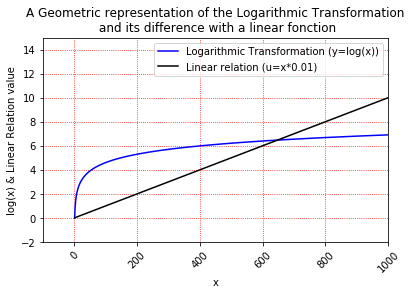

In [31]:
x = range(1, 2000)
y = np.log(x)
u = np.divide(x,100)

plt.figure(figsize = (6, 4))
plt.title('A Geometric representation of the Logarithmic Transformation\n and its difference with a linear fonction')
plt.xlabel('x')
plt.ylabel('log(x) & Linear Relation value')
plt.plot(x,y, label='Logarithmic Transformation (y=log(x))', color='blue')
plt.plot(x,u, label='Linear relation (u=x*0.01)', color='black')
plt.tight_layout()
plt.grid(color='red', linestyle='dotted')
xt = plt.xticks(rotation=45)
plt.xlim([-100,1000])
plt.ylim([-2,15])
plt.legend()
plt.show();

## dependent variable transformation(loss, log)

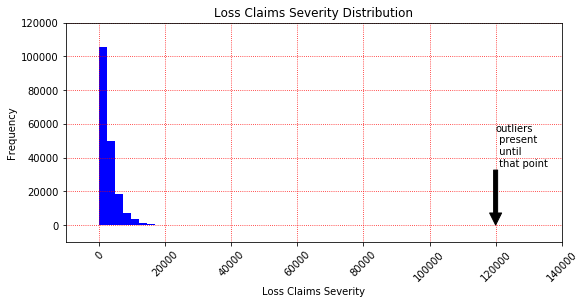

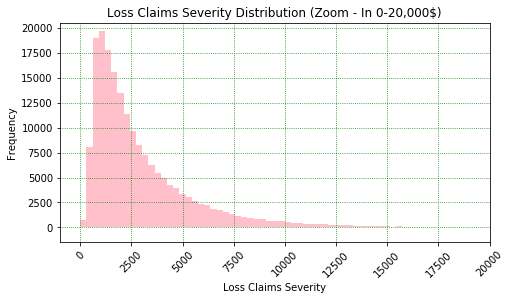

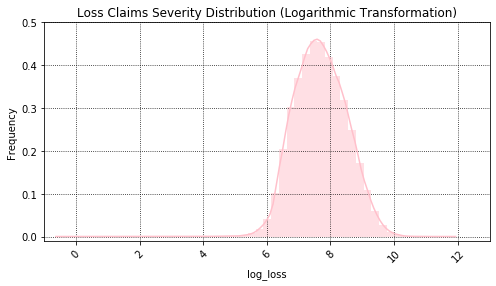

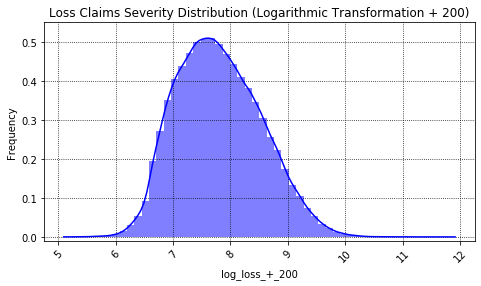

In [32]:
plt.figure(figsize = (8, 4))
plt.title('Loss Claims Severity Distribution')
plt.xlabel('Loss Claims Severity')
plt.ylabel('Frequency')
df['loss'].hist(bins=50, color='b')
plt.tight_layout()
plt.grid(color='red', linestyle='dotted')
xt = plt.xticks(rotation=45)
plt.xlim([-10000,140000])
plt.ylim([-10000,120000])
plt.annotate('outliers\n present\n until\n that point', 
xy=(120000, 100), xytext=(120000, 35000), arrowprops=dict(facecolor='black'), color='black')
plt.show();

plt.figure(figsize = (7, 4))
plt.title('Loss Claims Severity Distribution (Zoom - In 0-20,000$)')
plt.xlabel('Loss Claims Severity')
plt.ylabel('Frequency')
df['loss'].hist(bins=400, color='pink')
plt.tight_layout()
plt.grid(color='green', linestyle='dotted')
xt = plt.xticks(rotation=45)
plt.xlim([-1000,20000])
plt.ylim([-1500,20500])
plt.show();
df['log_loss'] = np.log(df['loss'])

plt.figure(figsize = (7, 4))
plt.title('Loss Claims Severity Distribution (Logarithmic Transformation)')
plt.xlabel('Log Loss Claims Severity')
plt.ylabel('Frequency')
sns.distplot(df['log_loss'], kde = True, color = 'pink', hist_kws={'alpha': 0.50})
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
xt = plt.xticks(rotation=45)
plt.xlim([-1,13])
plt.ylim([-0.01,0.5])
plt.show();

df['log_loss_+_200'] = np.log(200 + df['loss'])

plt.figure(figsize = (7, 4))
plt.title('Loss Claims Severity Distribution (Logarithmic Transformation + 200)')
plt.xlabel('Log Loss Claims Severity')
plt.ylabel('Frequency')
sns.distplot(df['log_loss_+_200'], kde = True, color = 'blue', hist_kws={'alpha': 0.50})
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
xt = plt.xticks(rotation=45)

plt.ylim([-0.01,0.55])
plt.show();

## Normality check for independent variable 

In [0]:
import statsmodels.api as sm

Text(0.5, 1.0, 'QQ-PLOT - Randomly Normally Distributed Sample')

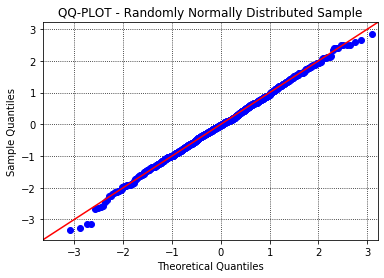

In [34]:
SAMPLE = np.random.normal(0,1, 1000)
sm.qqplot(SAMPLE, line='45')
plt.grid(color='black', linestyle='dotted')
plt.title('QQ-PLOT - Randomly Normally Distributed Sample')

Text(0.5, 1.0, 'QQ-PLOT - Loss Claims Severity Distribution (Logarithmic Transformation + 200)')

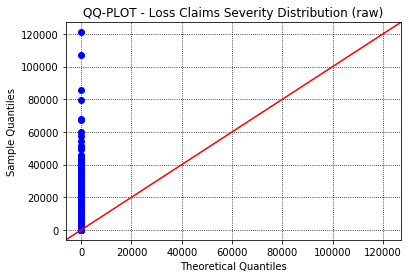

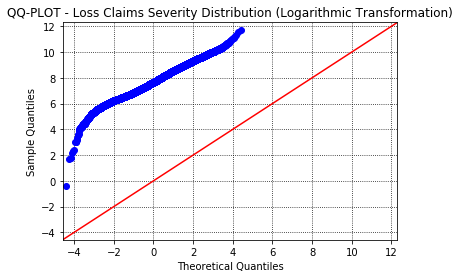

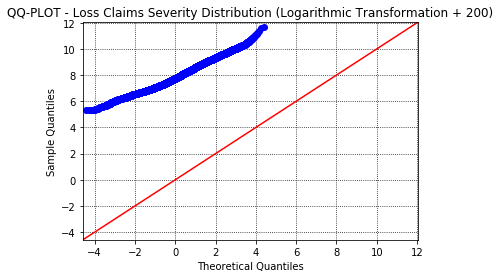

In [35]:
sm.qqplot(df['loss'], line='45')
plt.grid(color='black', linestyle='dotted')
plt.title('QQ-PLOT - Loss Claims Severity Distribution (raw)')

sm.qqplot(df['log_loss'], line='45')
plt.grid(color='black', linestyle='dotted')
plt.title('QQ-PLOT - Loss Claims Severity Distribution (Logarithmic Transformation)')


sm.qqplot(df['log_loss_+_200'], line='45')
plt.grid(color='black', linestyle='dotted')
plt.title('QQ-PLOT - Loss Claims Severity Distribution (Logarithmic Transformation + 200)')


In [36]:
all_categorical_covariates = [x for x in df.select_dtypes(include=['object']).columns if x not in ['id','loss', 'log_loss', 'log_loss_+_200']]
continuous_covariates = [x for x in df.select_dtypes(exclude=['object']).columns if x not in ['id','loss', 'log_loss', 'log_loss_+_200']]        
binary_categorical_covariates = [x for x in df.columns if len(df[x].unique()) == 2 and df[x].dtype == 'object']
non_bynary_categorical_covariates = [x for x in df.columns if len(df[x].unique()) > 2 and df[x].dtype == 'object']

print("List of Binary Categorical Covariates:\n")
print(binary_categorical_covariates)
print("\n")
print("List of Non Binary Categorical Covariates:\n")
print(non_bynary_categorical_covariates)
print("\n")
print("List of All Categorical Covariates:\n")
print(all_categorical_covariates)
print("\n")
print("List of Continuous Covariates:\n")
print(continuous_covariates)

List of Binary Categorical Covariates:

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72']


List of Non Binary Categorical Covariates:

['cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 

In [0]:
# perform label encodidng for categorical variable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
df_BINCAT = df[binary_categorical_covariates]
df_NONBINCAT = df[non_bynary_categorical_covariates]
df_ALLCAT = df[all_categorical_covariates]
df_CONTCAT = df[continuous_covariates]

In [0]:
for x in all_categorical_covariates:
    lb = LabelEncoder()
    lb.fit(df[x].unique())
    df[x] = lb.transform(df[x])

## Neural Network with Keras (Tensorflow backend) - No Learning Rate Control

In [0]:
import tensorflow as tf
tf.python.control_flow_ops = tf
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers.advanced_activations import PReLU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD


In [0]:
# split into test and train
from sklearn.model_selection import train_test_split
seed = 1

trainx = df.columns[1:73]
trainy = df.columns[-2]

X = df[trainx]
Y = df[trainy]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

## Neural Network with Keras (Tensorflow backend) - No Learning Rate Control

In [46]:
start_time = time.clock()

model = Sequential()
model.add(Dense(35, input_dim=X.shape[1]))
model.add(Activation('relu'))
model.add(Dense(17))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='mean_absolute_error', optimizer="rmsprop")
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=40, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    #fig.set_size_inches(16,5)

    #plt.set_title('{} 50 epochs'.format(title))
    #plt.set_xlabel('Epochs')
    #plt.set_ylabel('Loss')
    #plt.set_xlim([0,500])
    plt.ylim([0.48,0.55])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()
    
    plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()



Total Estimation Running Time:
20.460343000000023 Seconds


## Neural Network (Modifing Optimizer and Adding Learning rate Decay Schedule)

### SGD Optimizer used with learning rate  and momentum 0.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
155.11049299999996 Seconds


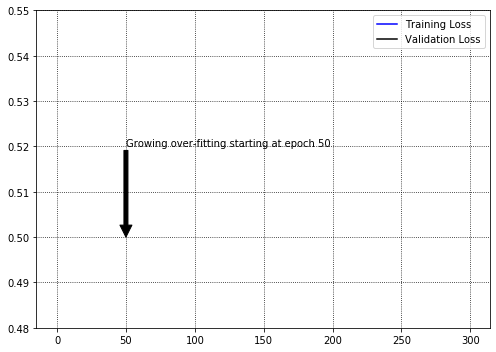

In [47]:
start_time = time.clock()

model = Sequential()
model.add(Dense(35, input_dim=X.shape[1]))
model.add(Activation('relu'))
model.add(Dense(17))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    #fig.set_size_inches(16,5)

    #plt.set_title('{} 50 epochs'.format(title))
    #plt.set_xlabel('Epochs')
    #plt.set_ylabel('Loss')
    #plt.set_xlim([0,500])
    plt.annotate('Growing over-fitting starting at epoch 50', 
    xy=(50, 0.50), xytext=(50, 0.52), arrowprops=dict(facecolor='black'), color='black')
    plt.ylim([0.48,0.55])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

## Neural Network (Adding Dropout as Regularization for Avoiding Over-fitting)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
216.8658660000001 Seconds


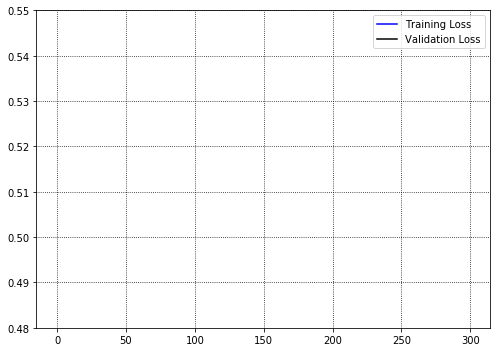

In [51]:
start_time = time.clock()

model = Sequential()
model.add(Dense(35, input_dim=X.shape[1]))
model.add(Dropout(0.05))
model.add(Activation('relu'))
model.add(Dense(17))
model.add(Dropout(0.05))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    #fig.set_size_inches(16,5)

    #plt.set_title('{} 50 epochs'.format(title))
    #plt.set_xlabel('Epochs')
    #plt.set_ylabel('Loss')
    #plt.set_xlim([0,500])
    #plt.annotate('Linear Model Benchmark is 0.5', 
    #xy=(50, 0.50), xytext=(100, 0.5005), arrowprops=dict(facecolor='black'), color='black')
    plt.ylim([0.48,0.55])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

## Neural Network (Dropout Adjustment for Allowing Training Set to Learn Enough)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
219.80019199999992 Seconds


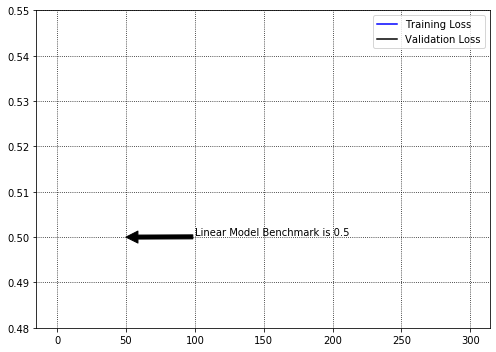

In [53]:
start_time = time.clock()

model = Sequential()
model.add(Dense(35, input_dim=X.shape[1]))
model.add(Dropout(0.01))
model.add(Activation('relu'))
model.add(Dense(17))
model.add(Dropout(0.01))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    #fig.set_size_inches(16,5)

    #plt.set_title('{} 50 epochs'.format(title))
    #plt.set_xlabel('Epochs')
    #plt.set_ylabel('Loss')
    #plt.set_xlim([0,500])
    plt.annotate('Linear Model Benchmark is 0.5', 
    xy=(50, 0.50), xytext=(100, 0.5005), arrowprops=dict(facecolor='black'), color='black')
    plt.ylim([0.48,0.55])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

## Neural Network on preprocess data

## the same neural network perform better on preprocess data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
214.04964200000018 Seconds


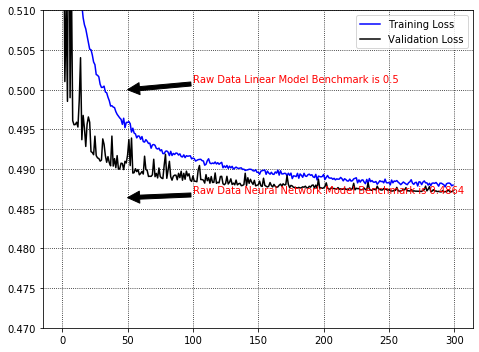

In [59]:
start_time = time.clock()

model = Sequential()
model.add(Dense(35, input_dim=X.shape[1]))
model.add(Dropout(0.01))
model.add(Activation('relu'))
model.add(Dense(17))
model.add(Dropout(0.01))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    #fig.set_size_inches(16,5)

    #plt.set_title('{} 50 epochs'.format(title))
    #plt.set_xlabel('Epochs')
    #plt.set_ylabel('Loss')
    #plt.set_xlim([0,500])
    plt.annotate('Raw Data Linear Model Benchmark is 0.5', 
    xy=(50, 0.50), xytext=(100, 0.50099999), arrowprops=dict(facecolor='black'), color='red')
    plt.annotate('Raw Data Neural Network Model Benchmark is 0.4864', 
    xy=(50, 0.4864), xytext=(100, 0.48699999), arrowprops=dict(facecolor='black'), color='red')
    plt.ylim([0.47,.51])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

In [60]:
models_history['mlp_v1']['val_loss'][-1]

0.4872620462510377

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
813.9147119999998 Seconds


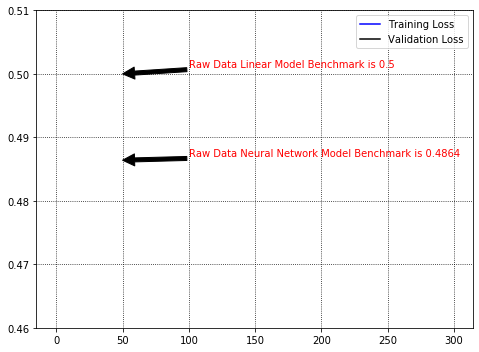

In [62]:
start_time = time.clock()
model = Sequential()
model.add(Dense(200, input_dim=X.shape[1]))
model.add(Dropout(0.15))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.15))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    plt.annotate('Raw Data Linear Model Benchmark is 0.5', 
    xy=(50, 0.50), xytext=(100, 0.50099999), arrowprops=dict(facecolor='black'), color='red')
    plt.annotate('Raw Data Neural Network Model Benchmark is 0.4864', 
    xy=(50, 0.4864), xytext=(100, 0.48699999), arrowprops=dict(facecolor='black'), color='red')
    plt.ylim([0.46,.51])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  
end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

## The neural network used so far is about 2 hiden layer. 
## The first hidden layer is about 200 neurons, while the second one is 100 neurons.
## The running time is 7 minutes on 200,000 observation and 30 variables. 
## We get 0.47 on the validation set with no apparent overfitting.
## We used the same setting as the previous network and only the Dropout probability needed to be level up. 
## Since the model is more powerful, a higher level of regularization is required. 
## Now, Let's increase the power of the network even more. 3 hidden layer with 400, 200 and 100 neurons respectively.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Total Estimation Running Time:
2170.960051 Seconds


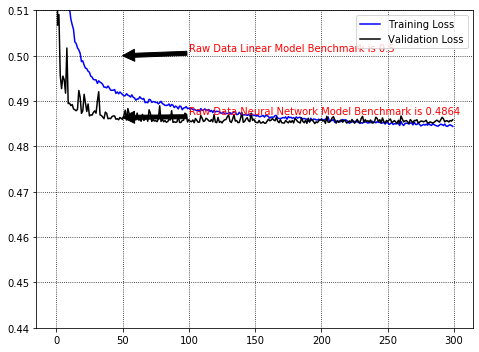

In [65]:
start_time = time.clock()

model = Sequential()
model.add(Dense(400, input_dim=X.shape[1]))
model.add(Dropout(0.15))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Dropout(0.15))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.15))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

epochs = 300
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer=sgd)
fit = model.fit(X.values, Y, validation_split=0.2, batch_size=5000, nb_epoch=epochs, verbose=0)

hist = fit.history
models_history = {}
models_history['mlp_v1'] = hist

def plot_mlp_loss(history, title):
    plt.figure(figsize = (7, 5))
    plt.annotate('Raw Data Linear Model Benchmark is 0.5', 
    xy=(50, 0.50), xytext=(100, 0.50099999), arrowprops=dict(facecolor='black'), color='red')
    plt.annotate('Raw Data Neural Network Model Benchmark is 0.4864', 
    xy=(50, 0.4864), xytext=(100, 0.48699999), arrowprops=dict(facecolor='black'), color='red')
    plt.ylim([0.44,.51])
    plt.grid(True)
    plt.plot(history['loss'][0:500], label='Training Loss', color='blue')
    plt.plot(history['val_loss'][0:500], label='Validation Loss', color='black')
    plt.tight_layout()
    plt.grid(color='black', linestyle='dotted')
    plt.legend()

plot_mlp_loss(models_history['mlp_v1'], 'mlp_v1')  

end_time = time.clock()

print("")
print("Total Estimation Running Time:")
print(end_time - start_time, "Seconds")

In [69]:
PREDICTION = model.predict_proba(X.values[37663:,:], verbose=0)
PREDICTION

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:248: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


array([[6.8906136],
       [8.407324 ],
       [8.258792 ],
       ...,
       [7.420701 ],
       [8.084119 ],
       [8.104958 ]], dtype=float32)

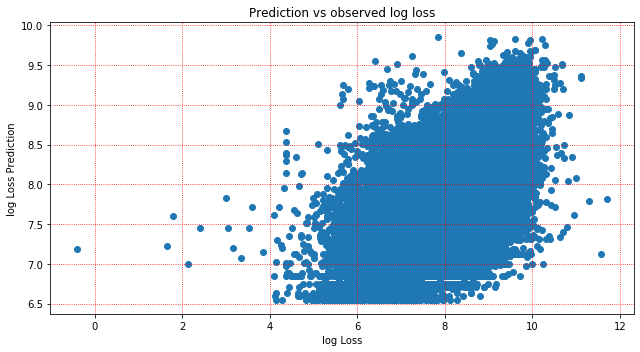

In [74]:
plt.figure(figsize=(9,5), facecolor='white')
plt.scatter(Y[37663:], PREDICTION)
plt.xlabel('log Loss')
plt.ylabel('log Loss Prediction')
plt.title('Prediction vs observed log loss')
plt.tight_layout()
plt.grid(color='red', linestyle='dotted')
plt.show();

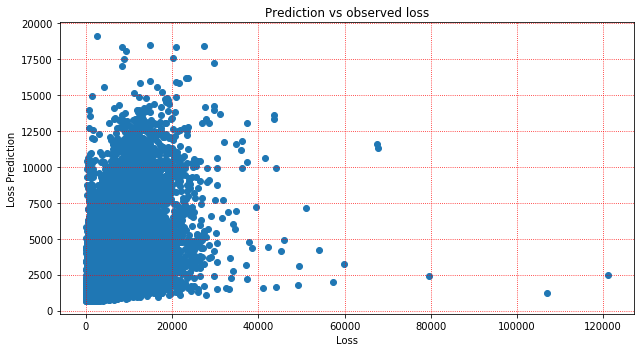

In [73]:
Y_VALIDATION_original = np.exp(Y[37663:])
PREDICTION_original = np.exp(PREDICTION)

plt.figure(figsize=(9,5), facecolor='white')
plt.scatter(Y_VALIDATION_original, PREDICTION_original)
plt.xlabel('Loss')
plt.ylabel('Loss Prediction')
plt.title('Prediction vs observed loss')
plt.tight_layout()
plt.grid(color='red', linestyle='dotted')
plt.show();